#**Lab 4 : CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics


# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

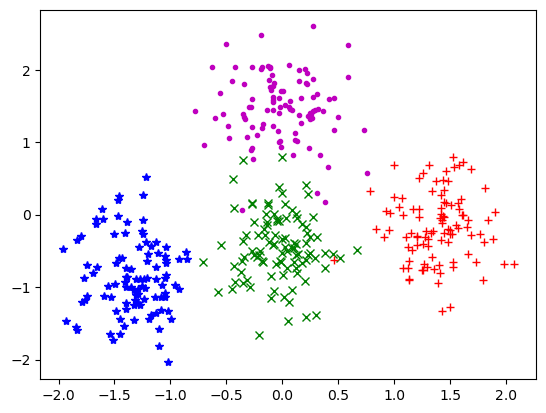

In [2]:
# write your code here
cov = [[1, 0], [0, 1]]
x=np.random.multivariate_normal([0.5,0], cov , size=100)
y=np.random.multivariate_normal([5,5], cov, size=100)
z=np.random.multivariate_normal([5,1], cov, size=100)
w=np.random.multivariate_normal([10,1.5], cov, size=100)
X=np.concatenate([x,y,z,w])

X=(X-(np.mean(X,axis=0)))/(np.std(X,axis=0))
# print(X.shape)
clr=['b','m','g','r']
mrk=['*','.','x','+']

lab1=np.zeros(x.shape[0])
lab2=np.ones(y.shape[0])
lab3=np.tile([2],z.shape[0])
lab4=np.tile([3],w.shape[0])
lab=np.concatenate((lab1,lab2,lab3,lab4))
# print(lab.shape)

plt.figure()
for l in range(4):
    id=np.where(lab==l)
    plt.plot(X[id,0],X[id,1],color=clr[l],marker=mrk[l])

plt.show()

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[[-1.13067492 -0.37016745]
 [ 0.21413592 -0.39368493]
 [-0.12561066  0.16207394]
 [ 0.72979531  1.17367927]]


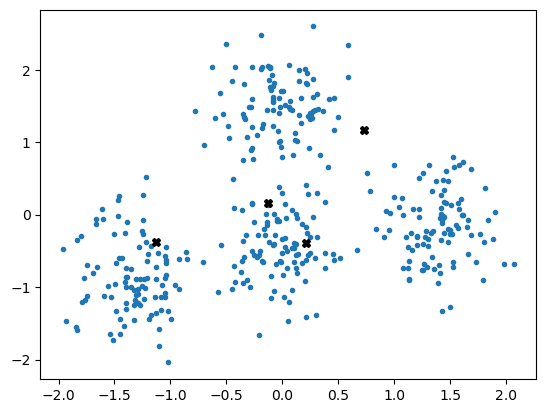

In [3]:
# write your code here

K=4  # no of clusters
KMI=20  # no of iterations

# random initialization of clusters
idx=np.random.randint(0,X.shape[0],K)
cntrd=X[idx,:]
print(cntrd)

# initialized a array to store distance, assigned label, minimum distance
distance=np.zeros((X.shape[0],K+2))



plt.figure()
plt.plot(X[:,0],X[:,1],'.')
plt.plot(cntrd[:,0],cntrd[:,1],'X',color='k')

plt.show()

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

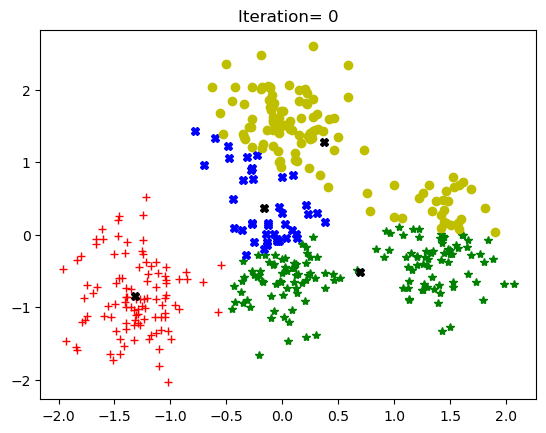

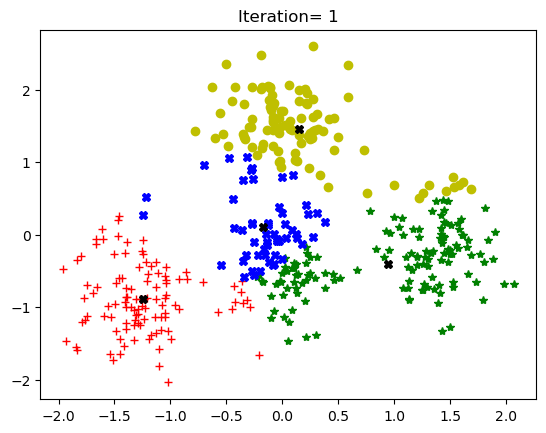

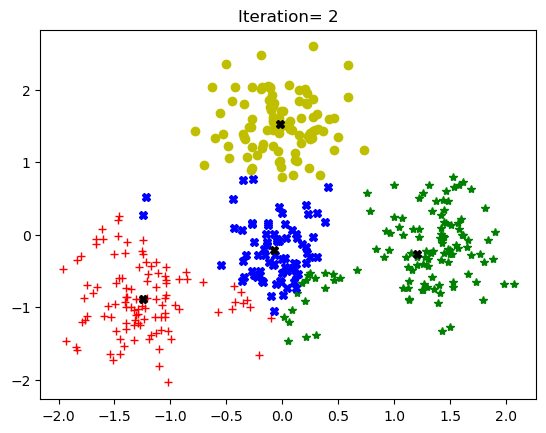

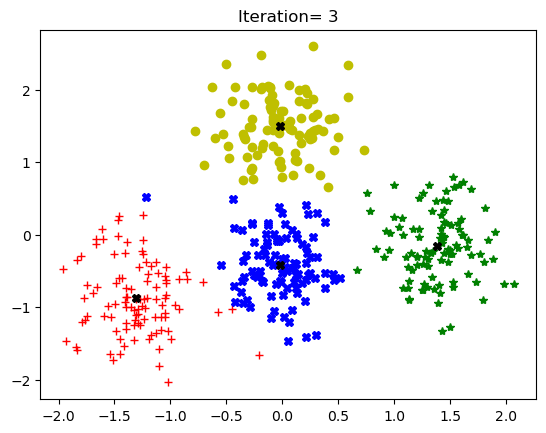

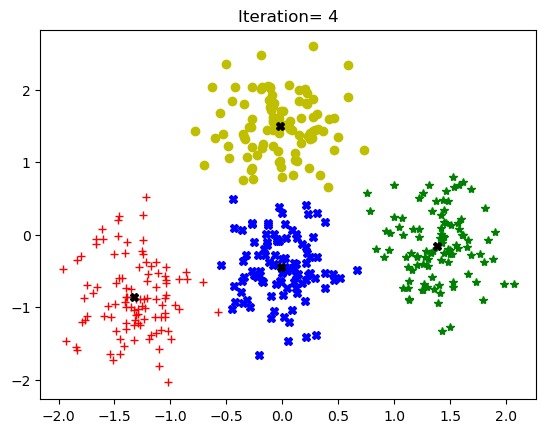

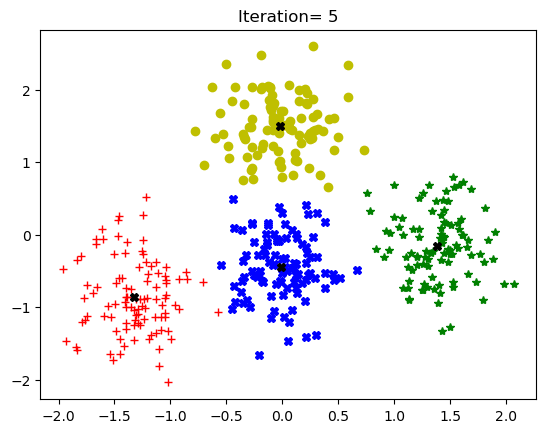

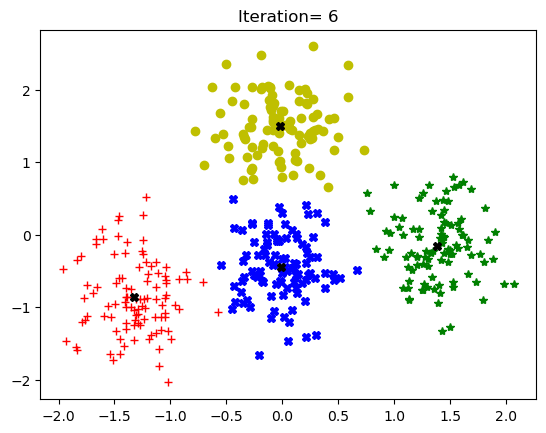

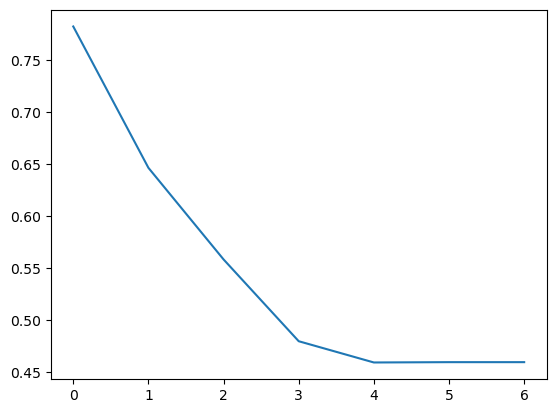

In [4]:
# write your code here

error=[]
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


for n in range(KMI):
# assignment stage
  for i in range(X.shape[0]):
    for j in range(K):
      distance[i,j]=np.linalg.norm(X[i,:]-cntrd[j,:])

    Dist=np.min(distance[i,:K])
    ind=int((np.where(Dist==distance[i,:K])[0]))
    distance[i,K]=ind
    distance[i,K+1]=Dist

# re-estimation stage
  for i in range(K):
    ind=np.where(distance[:,K]==i)
    cntrd[i,:]=np.mean(X[ind,:][0],axis=0)

  error.append(np.mean(distance[:,K+1]))  
  # print(cntrd)

# for ploting 
  plt.figure()
  for l in range(K):
    id=np.where(distance[:,K]==l)
    plt.plot(X[id,0],X[id,1],color=clr[l],marker=mrk[l])
  plt.plot(cntrd[:,0],cntrd[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
   if abs(error[n]-error[n-1])<eps:
    break


# plot the error curve
plt.figure()
plt.plot(error)

plt.show()

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [5]:
# write your code here

pred_lab=distance[:,K]
print(pred_lab)
print(lab)
print('Homogeneity Score=',metrics.homogeneity_score(pred_lab,lab))
print('Silhoette coefficient : ',metrics.silhouette_score(X,lab))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 0.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

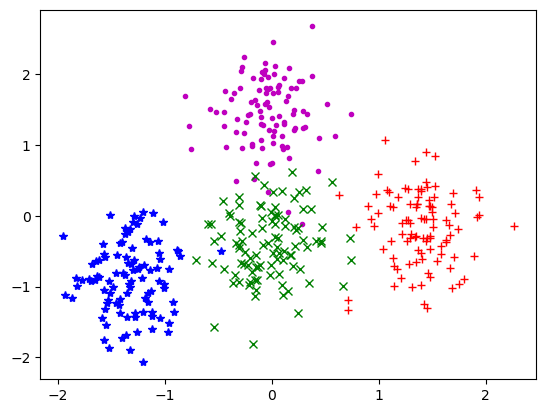

In [6]:
# write your code here
cov = [[1, 0], [0, 1]]
x=np.random.multivariate_normal([0.5,0], cov , size=100)
y=np.random.multivariate_normal([5,5], cov, size=100)
z=np.random.multivariate_normal([5,1], cov, size=100)
w=np.random.multivariate_normal([10,1.5], cov, size=100)
X=np.concatenate([x,y,z,w])

X=(X-(np.mean(X,axis=0)))/(np.std(X,axis=0))
# print(X.shape)
clr=['b','m','g','r']
mrk=['*','.','x','+']

lab1=np.zeros(x.shape[0])
lab2=np.ones(y.shape[0])
lab3=np.tile([2],z.shape[0])
lab4=np.tile([3],w.shape[0])
lab=np.concatenate((lab1,lab2,lab3,lab4))
# print(lab.shape)

plt.figure()
for l in range(4):
    id=np.where(lab==l)
    plt.plot(X[id,0],X[id,1],color=clr[l],marker=mrk[l])

    
plt.show()

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [7]:
def initialization(data,K):

  # write your code here
  d=data.shape[1] # dimension of data
  # print(d)


# mean initialization
  pick_means=np.random.randint(0,data.shape[0],K)
  means=data[pick_means,:]
  means=np.transpose(means)

# covariance matrix initialization
  Covariance=np.zeros((d,d,K))
  for i in range(K):
    Covariance[:,:,i]=np.eye(d)*np.max(data,axis=None)    
    
#mixing coefficients
  proportions=np.ones((K,1))/K

  theta=[means,Covariance,proportions]

  cntrd=means.T
    
  return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [8]:

# E-Step GMMmatches_raw_df = pd.read_csv('matches.csv')
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):

    # write your code here
    means=theta[0]
    Covariance=theta[1]
    proportions=theta[2]
    #Computing responsibility coefficients of each point for each cluster.
    responsibility=np.zeros((len(data),K))
    for i in range(K):
        itr=0   # increase w.r.t datapoint 
        for x in data:
            normalising=0
# Compute probability of xj for cluster i 
            N_xn=multivariate_normal.pdf(x,mean=means[:,i], cov=Covariance[:,:,i])
            # # only to avoid 
            # if N_xn<10**(-20):
            #   N_xn=10**(-20)

            
            responsibility[itr][i]=proportions[i]*N_xn

            for j in range(K):
                normalising+=proportions[j]*(multivariate_normal.pdf(x,mean=means[:,j], cov=Covariance[:,:,j])+10**(-20))
            responsibility[itr][i]=responsibility[itr][i]/normalising
            itr+=1

    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [9]:

# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    # write your code here
    [N,K]=np.shape(responsibility) #N is number of data points
    d=data.shape[1]
    
    #Compute Proportions
    Nk=np.sum(responsibility,axis=0)
    proportions=Nk/N
        
    #Compute Means
    means=np.zeros((K,d))        
    for k in range(K):
        temp1=data
        temp2=responsibility[:,k]
        temp=temp1*temp2[:,None] #multiplying a vector with multiple columns
        means[k]=(1/Nk[k])*np.sum(temp,axis=0)  
    means=np.transpose(means)
        
    #Compute Covariance
    Covariance=np.zeros((d,d,K))        
    for k in range(K):
        for n in range(N):
            temp1=data[n,:]-means[:,k]
            temp2=np.outer(temp1,np.transpose(temp1)) # vector outer product
            temp=responsibility[n,k]*temp2
            Covariance[:,:,k]+=temp
        Covariance[:,:,k]=(1/Nk[k])*Covariance[:,:,k]
    
    theta=[means,Covariance,proportions]
    Likelihood=0
    log_likelihood=0
    for n in range(N):
        for k in range(K):
            Likelihood+=proportions[k]*(multivariate_normal.pdf(data[n,:],mean=means[:,k], cov=Covariance[:,:,k]))
        log_likelihood+=np.log(Likelihood)
           
    return theta, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

/tmp/ipykernel_63168/1195224418.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


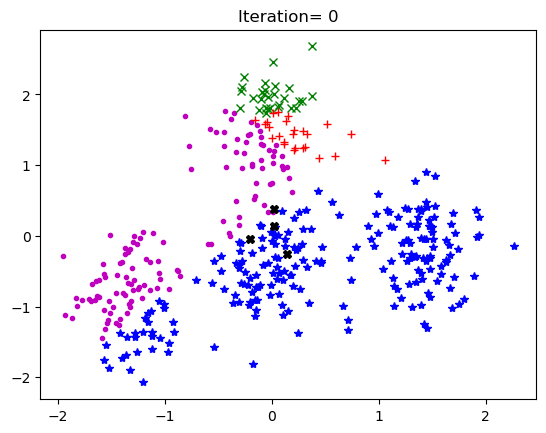

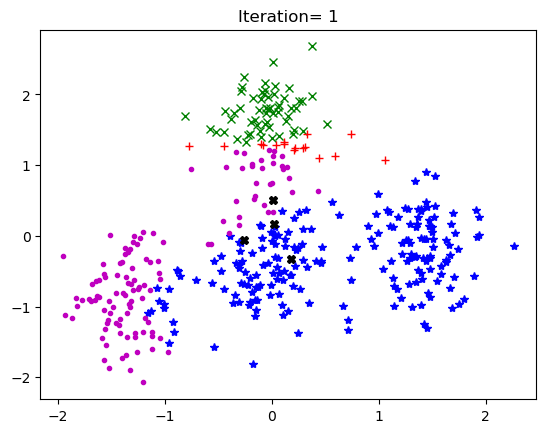

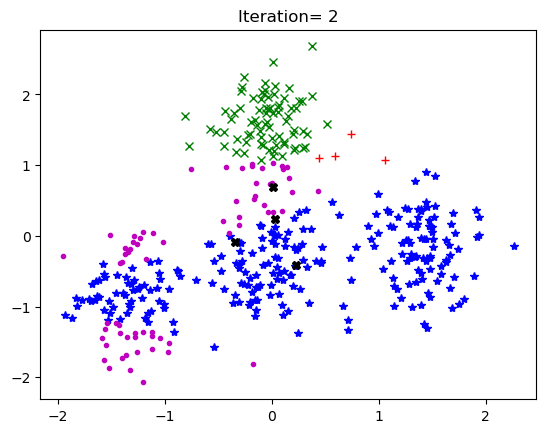

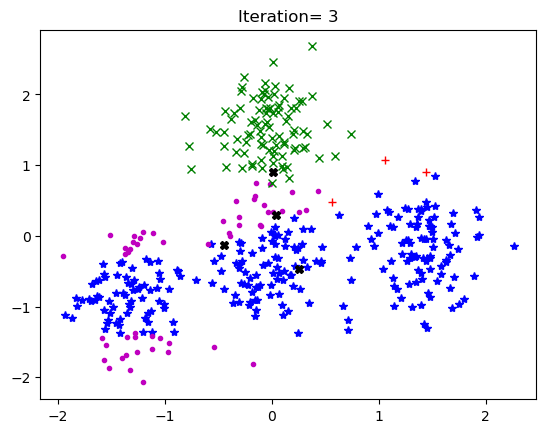

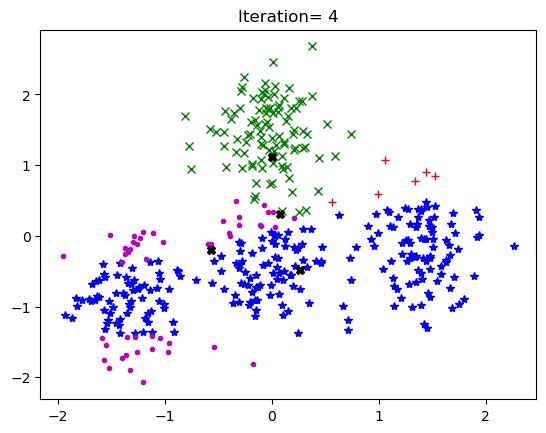

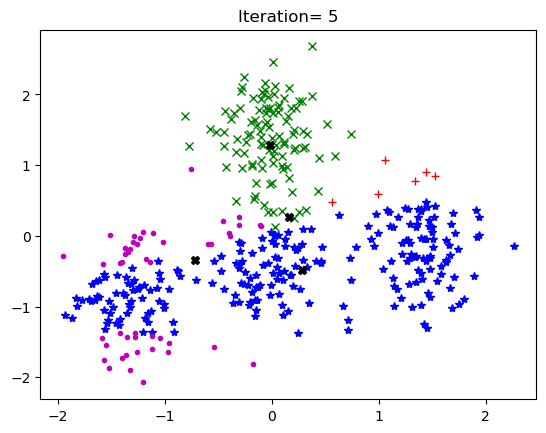

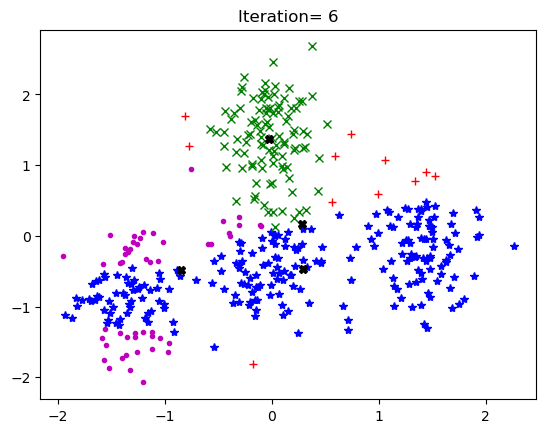

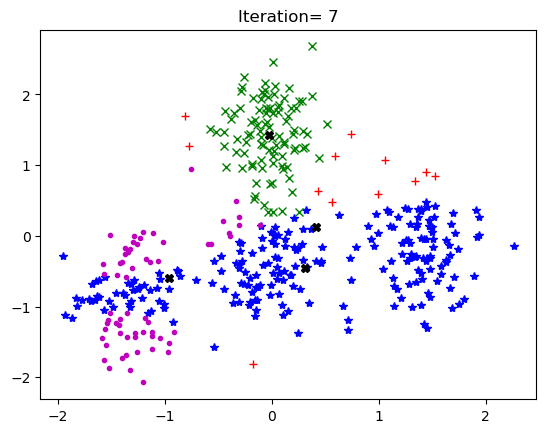

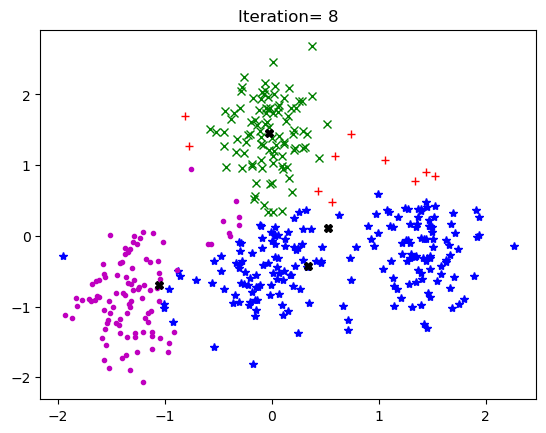

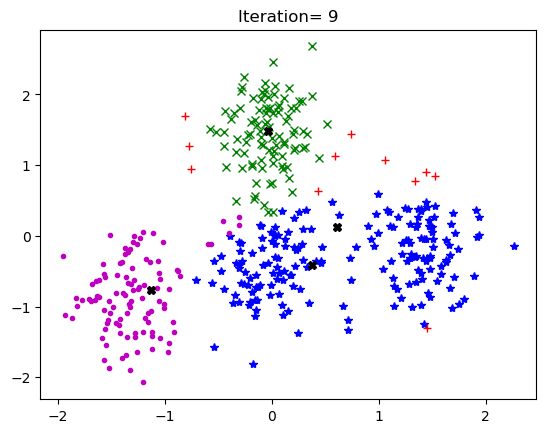

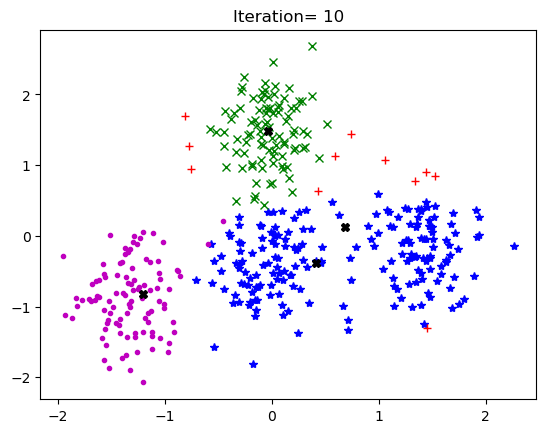

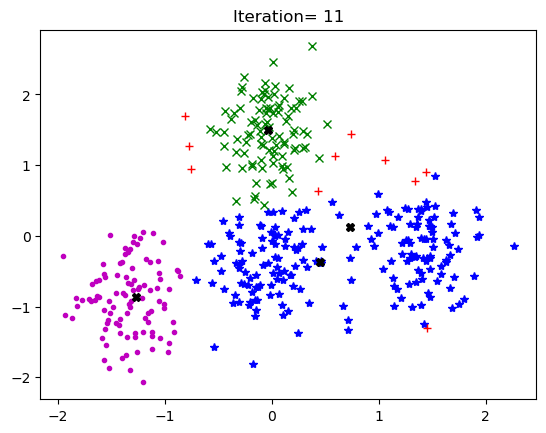

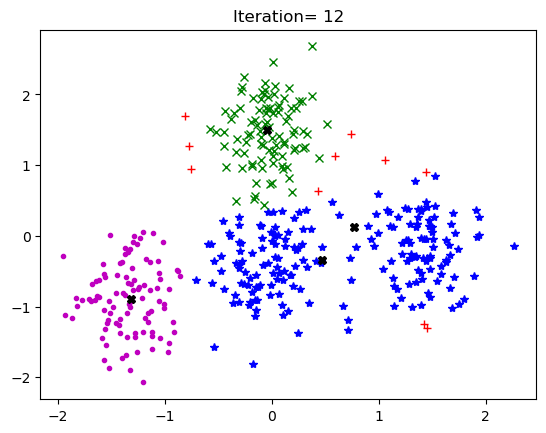

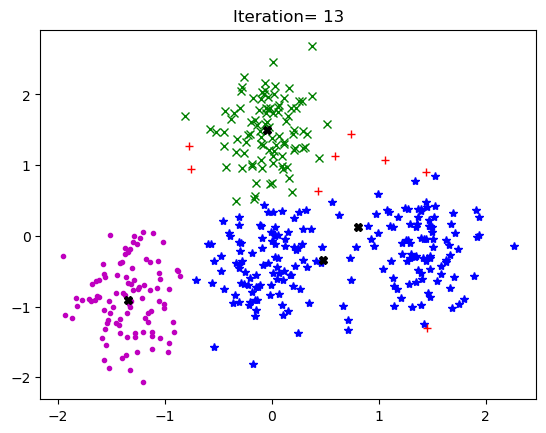

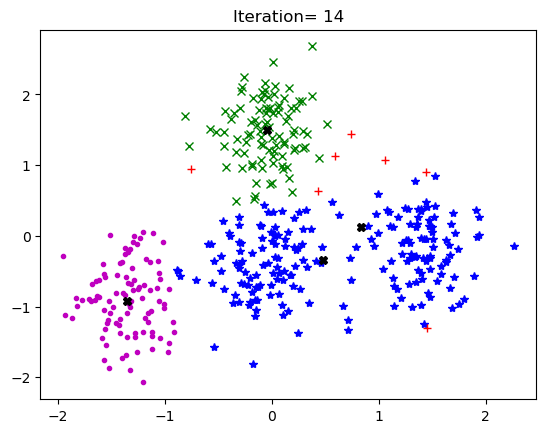

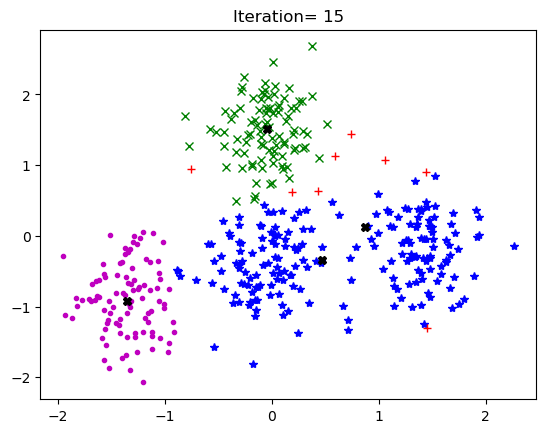

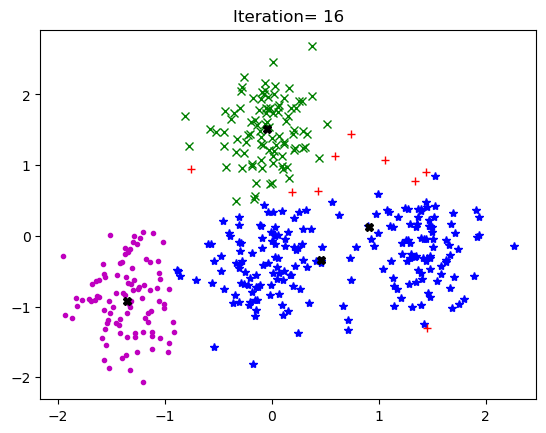

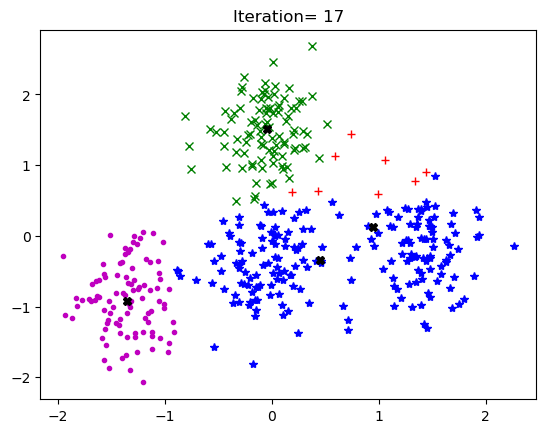

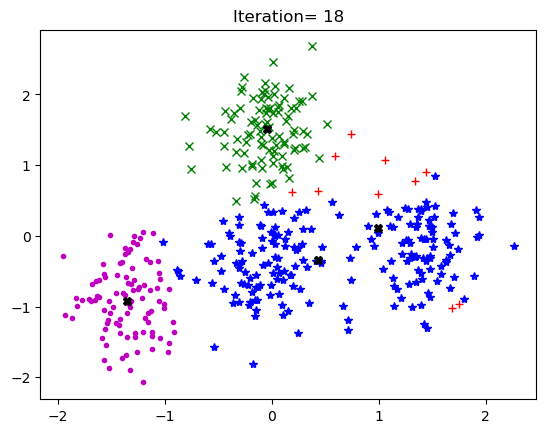

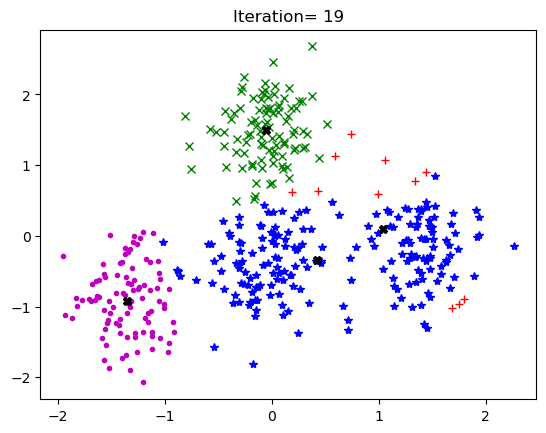

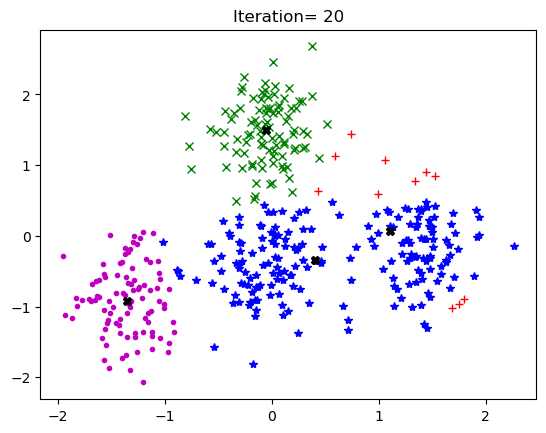

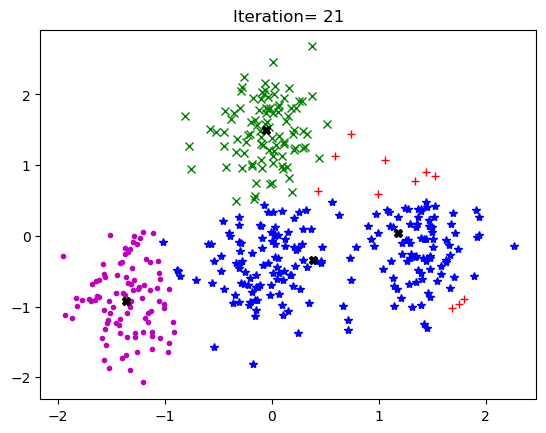

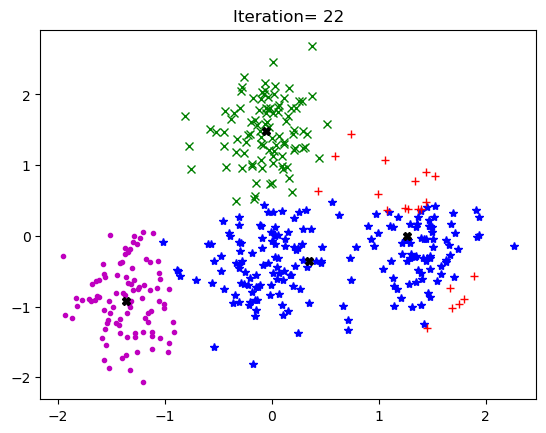

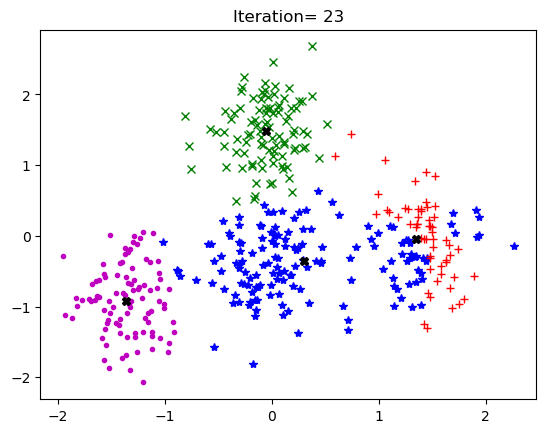

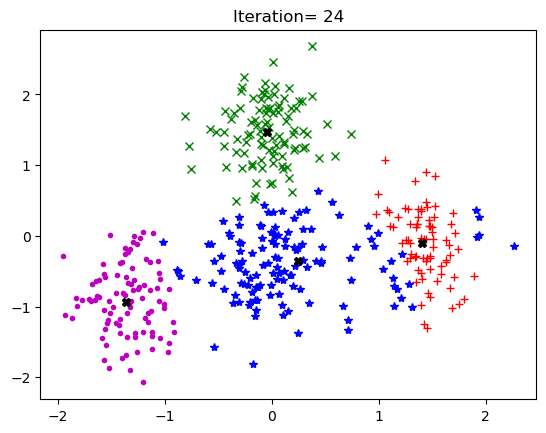

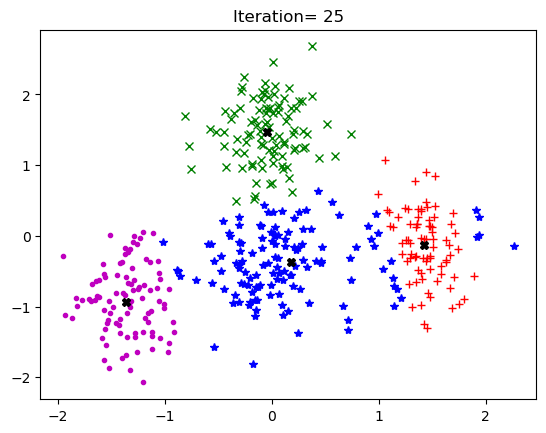

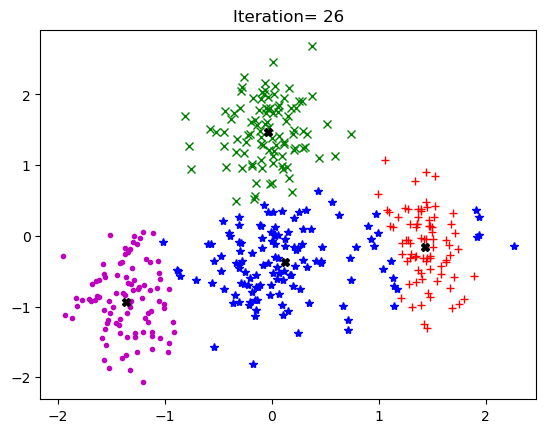

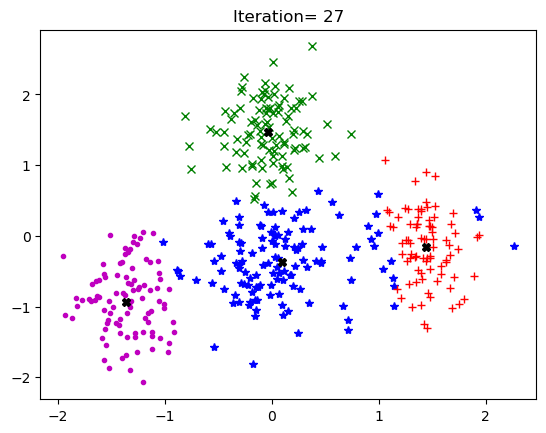

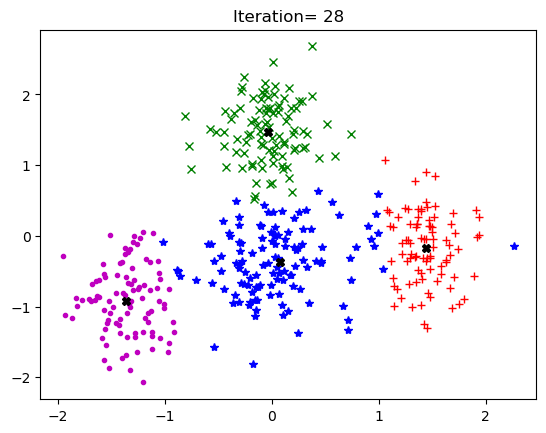

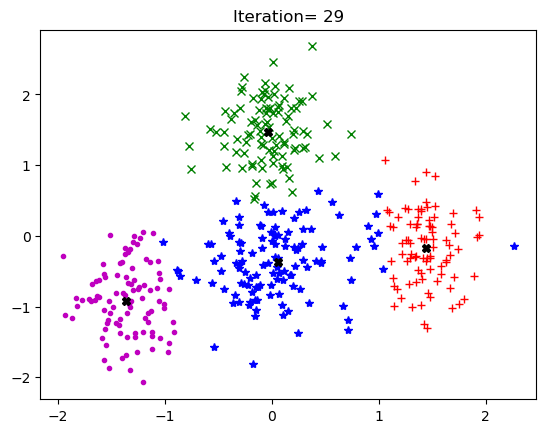

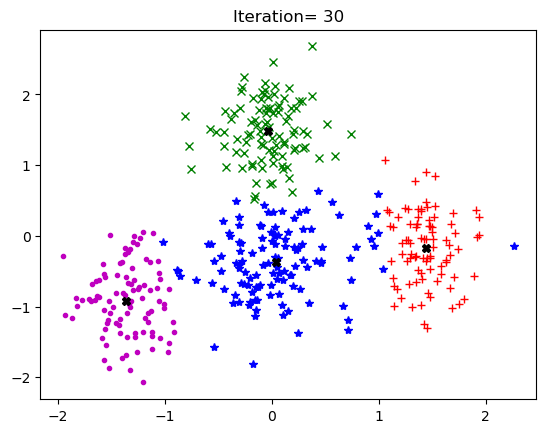

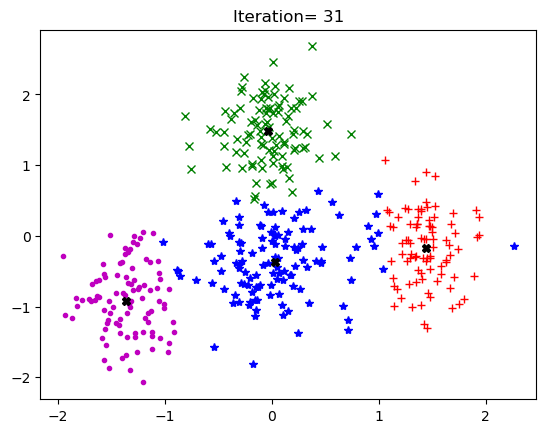

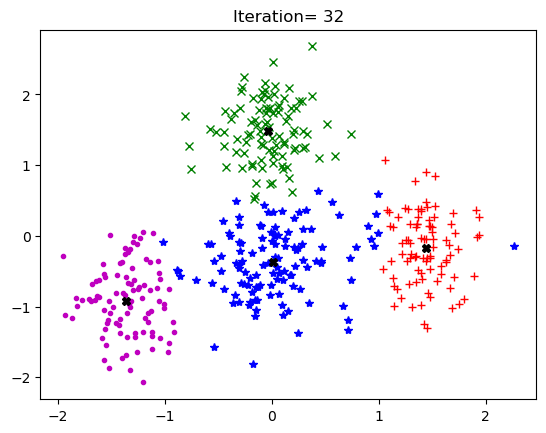

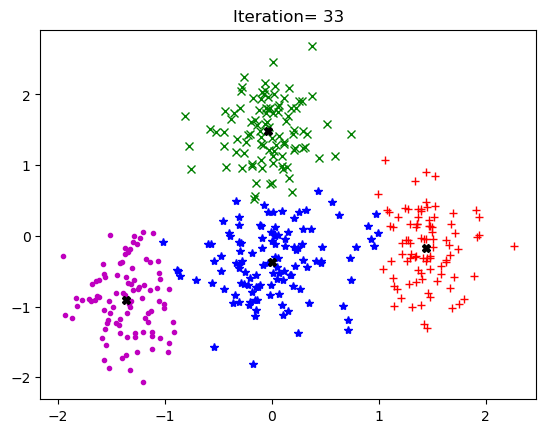

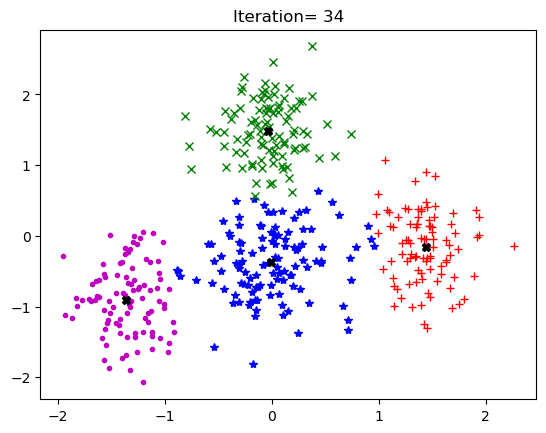

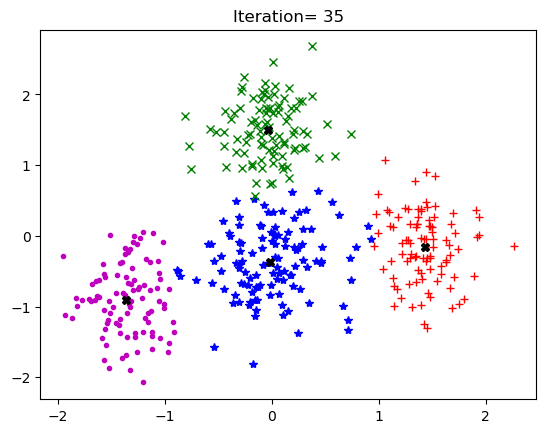

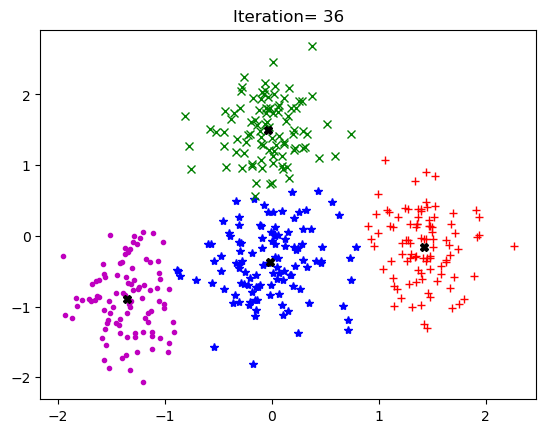

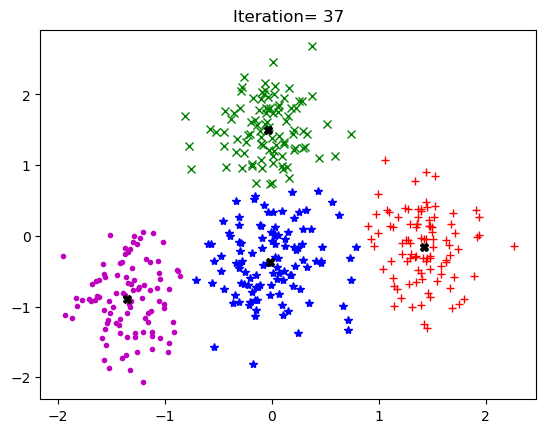

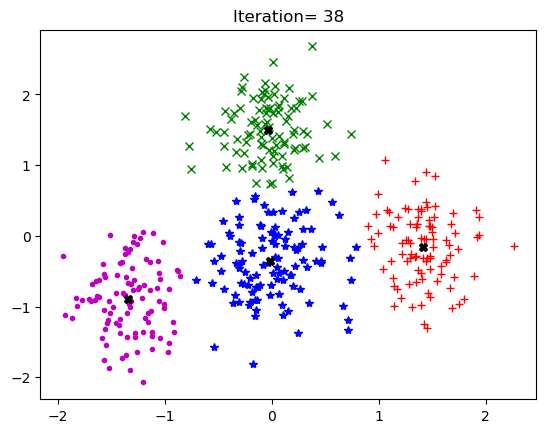

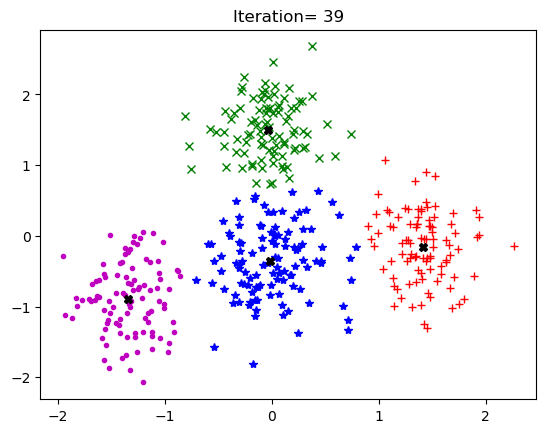

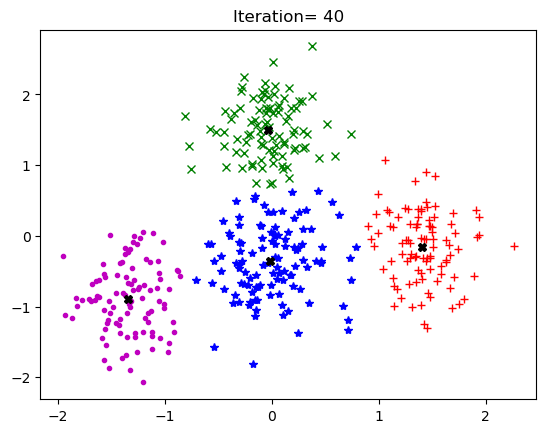

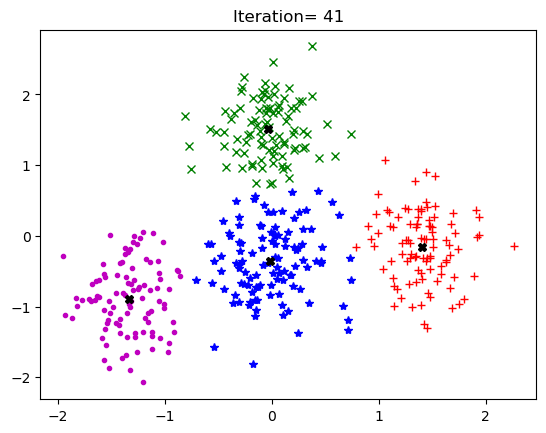

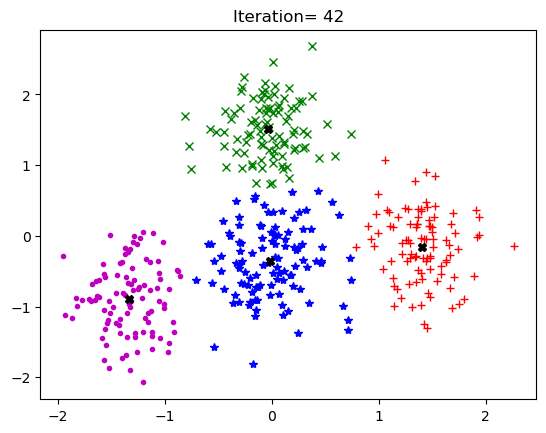

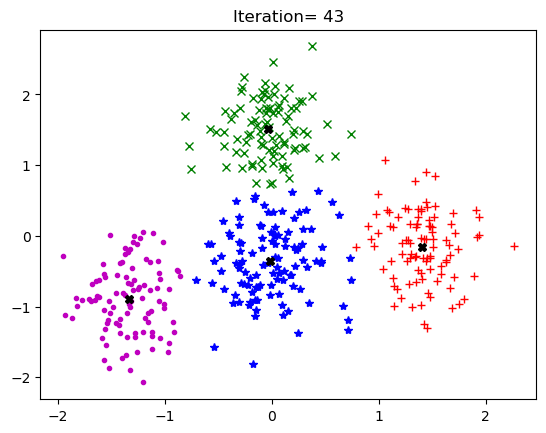

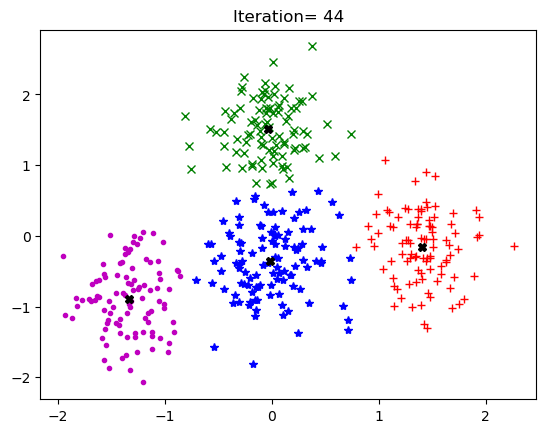

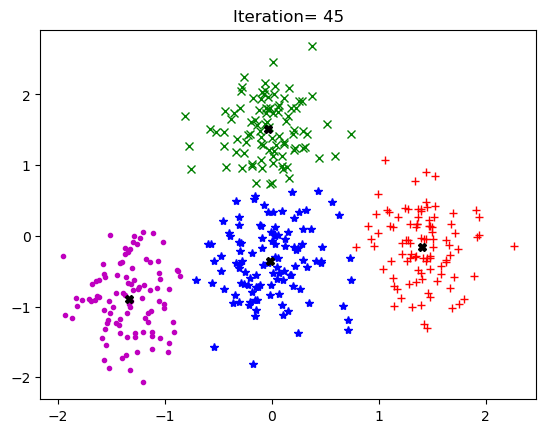

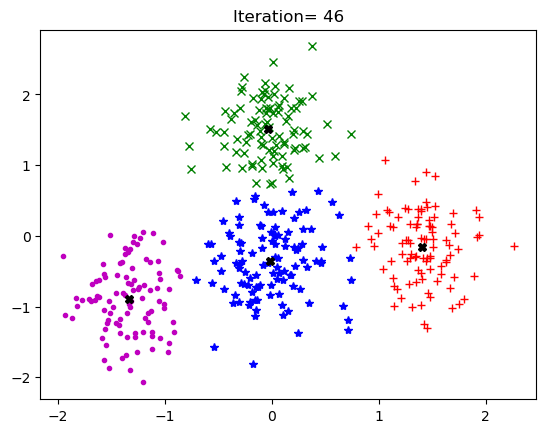

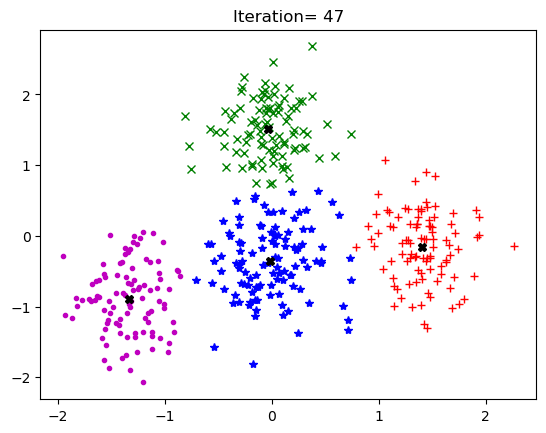

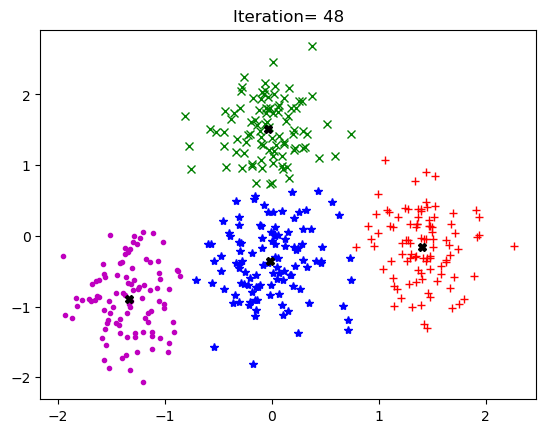

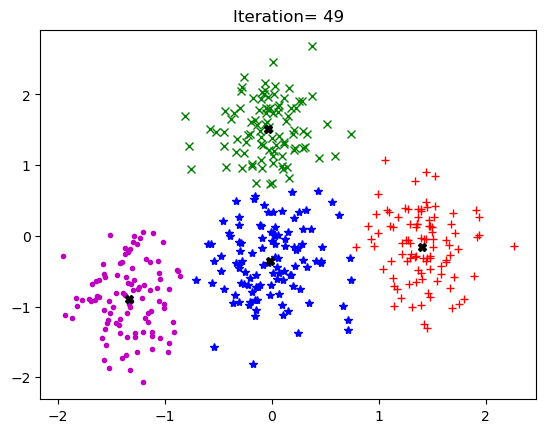

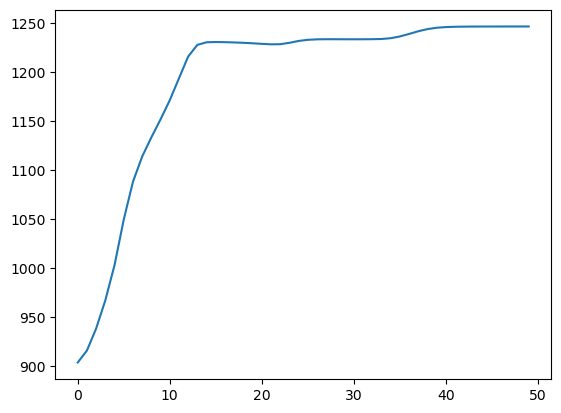

In [10]:
log_l=[]
Itr=50
eps=10**(-10)  # for threshold
clr=['b','m','g','r']
mrk=['*','.','x','+']


K = 4   # no. of clusters

theta=initialization(X,K)

# print(theta)
for n in range(Itr):

  responsibility=E_Step_GMM(X,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(X,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(X[id,0],X[id,1],color=clr[l],marker=mrk[l])
  cntrd=theta[0].T
  plt.plot(cntrd[:,0],cntrd[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

plt.show()

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [11]:
# write your code here
pred_lab=cluster_label
# print(K)
print(pred_lab)
print(lab)
print('Homogeneity Score =',metrics.homogeneity_score(pred_lab,lab))
print('Silhoette coefficient : ',metrics.silhouette_score(X,lab))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

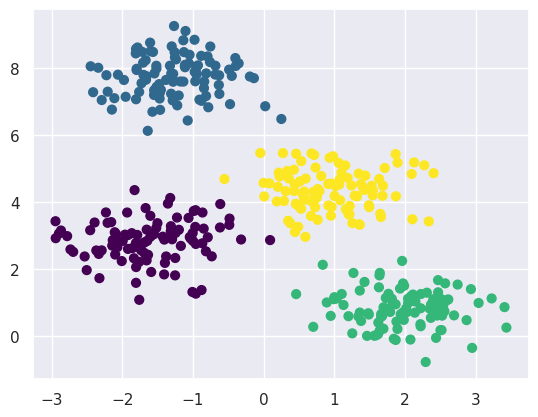

In [12]:
# write your code here
import seaborn as sns; sns.set()

# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.60, random_state=0)
# X = X[:, ::-1] # flip axes for better plotting

# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');
plt.show()

0.6783938627405857


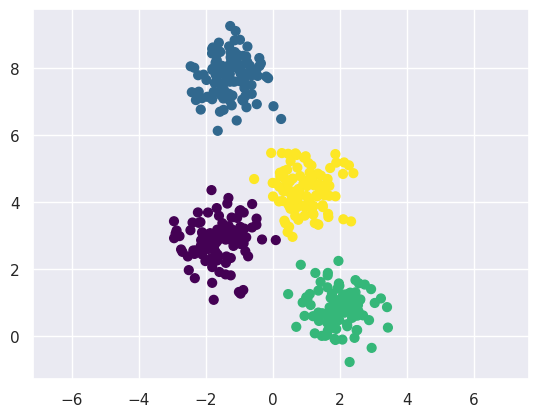

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    score = metrics.silhouette_score(X, labels)
    print(score)

# rng = np.random.RandomState(13)
# X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

plt.show()

In [14]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

[[0.469 0.    0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]
0.6778186532400019


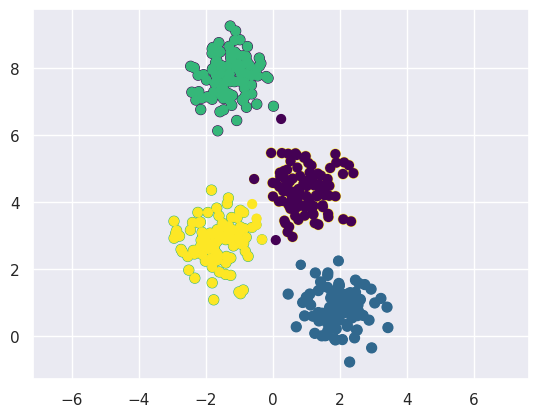

In [15]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    score = metrics.silhouette_score(X, labels)
    print(score)

gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X)

plt.show()

# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# !pip install idx2numpy

In [16]:
## write your code here
## write your code here
import pandas as pd
data = pd.read_csv('./lab_files/Lab_04/Iris.csv')
data[['target']] = data[['Species']].apply(lambda col:pd.Categorical(col).codes)
data.head()
# print(target)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
x = np.asarray(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values.tolist())
y = (data[['Species']].apply(lambda col:pd.Categorical(col).codes)).values.tolist()
target = np.asarray([item for sublist in y for item in sublist])
print(target)
print(x.shape)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


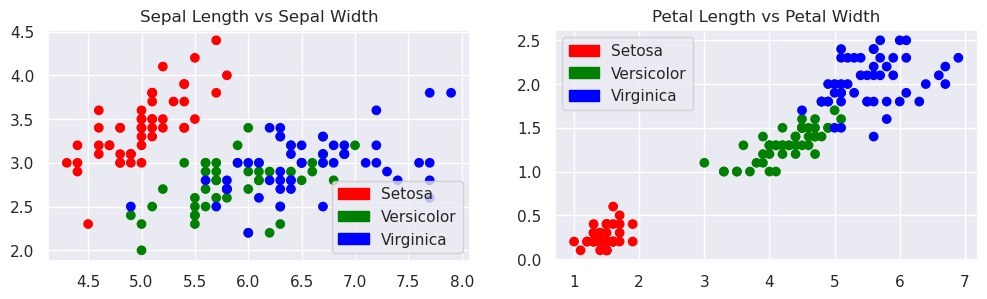

In [18]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(['Setosa','Versicolor','Virginica'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1, 2, 1)
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'],c=colors[data['target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'],c=colors[data['target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

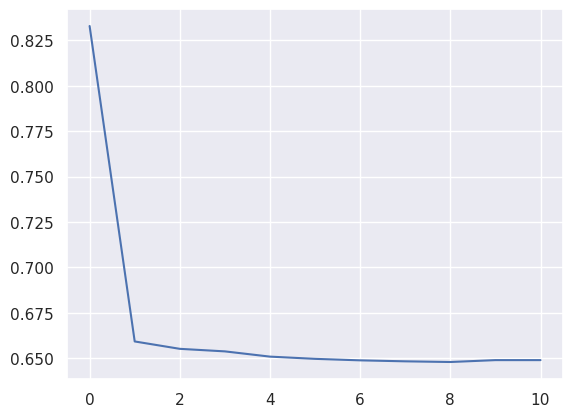

In [19]:
def kmnclst(x,k,iterations,precision):
  index=np.random.randint(0,x.shape[0],k)
  cntrd=x[index,:]
  # print(cntrd)

  distance=np.zeros((x.shape[0],k+2))
  error=[]
  data1=x #+10**(-20)
  
  for n in range(iterations):
    # assignment stage
    for i in range(data1.shape[0]):
      for j in range(k):
        distance[i,j]=np.linalg.norm(data1[i,:]-cntrd[j,:])

      Dist=np.min(distance[i,:k])
      ind=int((np.where(Dist==distance[i,:k])[0]))
      distance[i,k]=ind
      distance[i,k+1]=Dist

# re-estimation stage
    for i in range(k):
      ind=np.where(distance[:,k]==i)
      if (data1[ind,:][0].shape[0])==0:
        id1=np.random.randint(0,data.shape[0],1)
        cntrd[i,:]=data1[id1,:]
      else:
        cntrd[i,:]=np.mean(data1[ind,:][0],axis=0)

    error.append(np.mean(distance[:,k+1]))  
    # print(cntrd)

    if n>2:
      if abs(error[n]-error[n-1])<eps:
        break
  return distance, cntrd, error
    
distance,cntrd,error=kmnclst(x,3,50,10**(-20))
# print(distance)
plt.figure()
plt.plot(error)

plt.show()




In [20]:
from sklearn import metrics

calculated_label=distance[:,3]
print(calculated_label)
print(target)
print('Homogeneity score : ',metrics.homogeneity_score(calculated_label,target))
print('Confusioin matrix : \n',metrics.confusion_matrix(calculated_label,target))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 0. 2.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Homogeneity score :  0.7474865805095326
Confusioin matrix : 
 [[ 0  3 36]
 [50  0  0]
 [ 0 47 14]]


In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
y_k=kmeans.fit_predict(x)
print(y_k)
print(target)
print('Homogeneity score : ',metrics.homogeneity_score(y_k,target))
print('Confusioin matrix : \n',metrics.confusion_matrix(y_k,target))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Homogeneity score :  0.7649861514489816
Confusioin matrix : 
 [[ 0 48 14]
 [50  0  0]
 [ 0  2 36]]


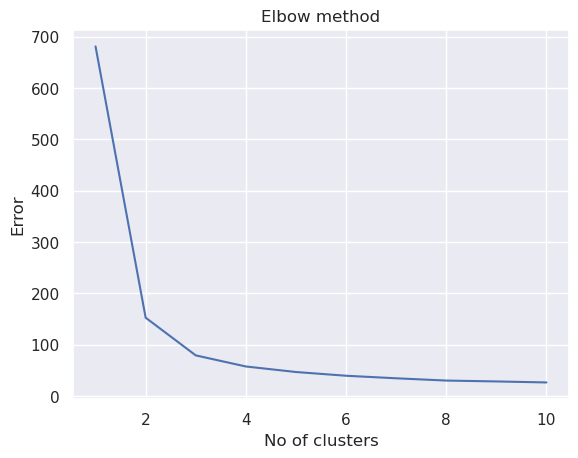

In [22]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

In [23]:
import pandas as pd
data = pd.read_csv('./lab_files/Lab_04/Iris.csv')
data[['target']] = data[['Species']].apply(lambda col:pd.Categorical(col).codes)
data.head()
x = np.asarray(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values.tolist())
y = (data[['Species']].apply(lambda col:pd.Categorical(col).codes)).values.tolist()
target = np.asarray([item for sublist in y for item in sublist])
print(target)
print(x.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


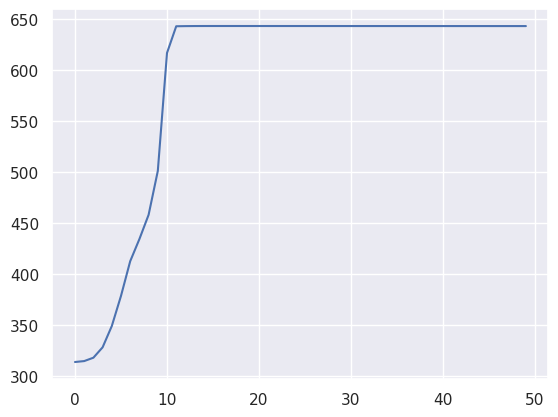

In [24]:
log_l=[]
Itr=50
eps=10**(-10)  # for threshold
clr=['b','m','g','r']
mrk=['*','.','x','+']


K = 3   # no. of clusters

theta=initialization(x,K)

# print(theta)
for n in range(Itr):

  responsibility=E_Step_GMM(x,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(x,responsibility)

  log_l.append(log_likhd)

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

plt.show()

In [27]:
pred_lab=cluster_label
# print(distance.shape)
print(pred_lab)
print(target)
print('Homogeneity Score =',metrics.homogeneity_score(pred_lab,target))
print('Confusioin matrix : \n',metrics.confusion_matrix(pred_lab,target))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Homogeneity Score = 0.6152543661828895
Confusioin matrix : 
 [[ 0 33 16]
 [ 0 17 34]
 [50  0  0]]


In [26]:
from sklearn.mixture import GaussianMixture as Gmm
gmm=Gmm(n_components=3, init_params='kmeans',covariance_type='diag',verbose=1)

gmm.fit(x)
gmm.get_params(deep=True)
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_

from sklearn import metrics

pred_lab=gmm.predict(x)
print(pred_lab)
print(target)
print('Homogeneity score : ',metrics.homogeneity_score(pred_lab,target))
print('Confusion matrix : \n',metrics.confusion_matrix(pred_lab,target))


Initialization 0
Initialization converged: True
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Homogeneity score :  0.7859016861703575
Confusion matrix : 
 [[ 0  1 36]
 [50  0  0]
 [ 0 49 14]]
